In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
from proj.cxs_are_revealed.paper.proj_common.npns import get_npn_data, compute_scores
from lib.common.mlm_singleton import init_singleton_scorer

mlm_scorer = init_singleton_scorer('roberta-large')


In [25]:

from proj.cxs_are_revealed.paper.proj_common.npn_dataset_generation.npn_utils import GPTOutput
from typing import List
from proj.cxs_are_revealed.paper.data_config import Exp4NPN

all_npns: List[GPTOutput] = get_npn_data(
    Exp4NPN.npn_gpt_outputs_v2_fixed,
    # Exp6NPN.npn_gpt_outputs,
    # Exp6NPN.npn_acceptability_ratings_csv,
    None,
    # None,
    output_has_noun_rep=False,
)
all_npns_target_preps = [
    # x for x in all_npns if x.prep in ['upon', 'after']
    x for x in all_npns
]
scores, ct_err, ct_multi, npn_results = compute_scores(
    all_npns_target_preps,
    allow_case_mismatch=True
)


392
notify (non error): more than 2 occurrences! asteroid The explorer traveled from asteroid to asteroid, seeking valuable minerals in the vast expanse of the asteroid belt. 

notify (non error): more than 2 occurrences! asteroid The spacecraft maneuvered through the dense asteroid belt, dodging asteroid upon asteroid in its daring journey. 

notify (non error): more than 2 occurrences! interior As an interior designer, she meticulously worked through interior after interior, bringing each one to life with her unique style. 

notify (non error): more than 2 occurrences! tow As the snowstorm raged on, the tow trucks worked relentlessly, pulling out tow after tow from the heaps of snow. 

notify (non error): more than 2 occurrences! tow The seasoned tow truck driver cleared the pileup on the highway, moving the vehicles tow by tow until the road was clear. 

notify (non error): more than 2 occurrences! comp As he delved deeper into his programming career, he found himself working on com

In [26]:
import statistics
for k in scores.keys():
    # print(sorted(map(lambda x: round(x, 2), scores[k])))
    print(k)
    print(statistics.mean(scores[k]))


to
0.526854371359073
after
0.8940689305765438
by
0.7048931956308235
upon
0.9033559047273882


In [33]:
from typing import Dict
from proj.cxs_are_revealed.paper.cxns_in_distrib import load_dict_from_file
from collections import defaultdict

# infinigram_dict: Dict[str, int] = load_dict_from_file(Exp6NPN.npn_infingram)
infinigram_dict: Dict[str, int] = load_dict_from_file(Exp4NPN.npn_roberta_infinigram)
ctr = defaultdict(list)
for npn_res in npn_results:
    phrase = npn_res.orig_gpt.noun + " " + npn_res.orig_gpt.prep + " " + npn_res.orig_gpt.noun
    ct = infinigram_dict[phrase]
    if ct > 0: continue
    ctr[npn_res.prep].append( npn_res.score)
# pp(ctr)

for k in ctr.keys():
    print(k)
    print(statistics.mean(ctr[k]))

upon
0.8739478079924764
after
0.7057107051375299
by
0.5855863880270794
to
0.16704497863115234


In [31]:
from pprint import pp

# i = 0
# for r in all_npns_target_preps:
#     prep = r.prep
#     if prep in ['upon', 'after']: continue
#     for i in range(0,2):
#         s = scores[prep][i]
#         if s > 0.95: continue
#         print(r.output)
#         i += 1
#         print(s)
for res in npn_results:
    if res.score < 0.95:
        pp(res._asdict())





{'orig_gpt': GPTOutput(noun='real',
                       prep='to',
                       model='gpt-4-0613',
                       output='They lived their lives real to real, always '
                              'being true to themselves and each other.',
                       finish_reason='stop'),
 'tokenized_sent': 'they lived their lives real to real , always being true to '
                   'themselves and each other .',
 'prep': 'to',
 'score': 0.04782165586948395,
 'fills': [' true', ' close', ' honest', ' real', ' authentic']}
{'orig_gpt': GPTOutput(noun='real',
                       prep='to',
                       model='gpt-4-0613',
                       output='They lived their lives real to real, always '
                              'being true to themselves and each other.',
                       finish_reason='stop'),
 'tokenized_sent': 'they lived their lives real to real , always being true to '
                   'themselves and each other .',
 'prep'

counts
to 196
after 196
by 196
upon 196
784


/var/folders/58/nkm5hbs97tz3vc0x5l5zl4w40000gn/T/ipykernel_20759/1606702605.py:34: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cats_prettied, y=values, ax=ax,inner='quartile', cut=0, edgecolor="black",saturation=0.1, scale="width")


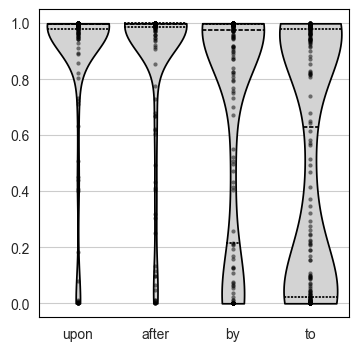

In [32]:
# verify that these results match prev paper results for roberta-large
# this is basically copied from exp_npn
from matplotlib import pyplot as plt
from collections import defaultdict
from typing import Dict
import seaborn as sns


def plot():
    aggregator: Dict[str, List[float]] = defaultdict(list)
    for res in npn_results:
        aggregator[res.prep].append(res.score)

    print('counts')
    for k in aggregator.keys():
        print(k, len(aggregator[k]))

    fig, ax = plt.subplots(figsize=(4,4))
    ax.set_ylim(-.05, 1.05)
    for spine in ax.spines.values():
        spine.set_edgecolor('black')  # Set dark color (or 'white' for light mode)

    cat_val_tuples = [(key, val) for key, vals in aggregator.items() for val in vals]
    order = ['upon', 'after','by', 'to']
    cat_val_tuples_sorted = sorted(cat_val_tuples, key=lambda x: order.index(x[0]))
    categories, values = zip(*cat_val_tuples_sorted)
    print(len(values))


    # for two cats
    cats_prettied = categories

    # sns.boxplot(x=cats_prettied, y=values)
    sns.violinplot(x=cats_prettied, y=values, ax=ax,inner='quartile', cut=0, edgecolor="black",saturation=0.1, scale="width")
    # Overlay Data Points (Jittered for Visibility)
    for violin in ax.collections:
        violin.set_facecolor("lightgray")
    sns.stripplot(x=cats_prettied, y=values, ax=ax,
                  color="black", alpha=0.5, size=3, jitter=False)  # Adjust size & alpha
plot()

